# Mushroom Classification

Notebook adapted from the 05.08 Random Forests notebook from the Python Data Science Handbook.  
Modified by: Gábor Major  
Last Modified date: 2024-11-22

**Description:**  
This notebook processes data about mushrooms in the Agaricus and Lepiota Family. It uses the features of the mushrooms to predict whether a mushroom is edible or poisonous.

# Disclaimer
**This model does not guarantee safe classification of mushrooms.  
Do not use this for ingesting mushrooms.  
Consult real world professionals on foraging and consuming mushrooms.**

In [1]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pickle

Declare conversion dictionary for later use

In [2]:
conversion_dict = {
    'poisonous': {
        'EDIBLE': 0,
        'POISONOUS': 1
    },
    'cap-shape': {
        'BELL': 0,
        'CONICAL': 1,
        'CONVEX': 2,
        'FLAT': 3,
        'KNOBBED': 4,
        'SUNKEN': 5
    },
    'cap-surface': {
        'FIBROUS': 0,
        'GROOVES': 1,
        'SCALY': 2,
        'SMOOTH': 3
    },
    'cap-color': {
        'BROWN': 0,
        'BUFF': 1,
        'CINNAMON': 2,
        'GRAY': 3,
        'GREEN': 4,
        'PINK': 5,
        'PURPLE': 6,
        'RED': 7,
        'WHITE': 8,
        'YELLOW': 9
    },
    'bruises': {
        'BRUISES': 0,
        'NO': 1
    },
    'odor': {
        'ALMOND': 0,
        'ANISE': 1,
        'CREOSOTE': 2,
        'FISHY': 3,
        'FOUL': 4,
        'MUSTY': 5,
        'NONE': 6,
        'PUNGENT': 7,
        'SPICY': 8
    },
    'gill-attachment': {
        'ATTACHED': 0,
        'DESCENDING': 1,
        'FREE': 2,
        'NOTCHED': 3
    },
    'gill-spacing': {
        'CLOSE': 0,
        'CROWDED': 1,
        'DISTANT': 2
    },
    'gill-size': {
        'BROAD': 0,
        'NARROW': 1
    },
    'gill-color': {
        'BLACK': 0,
        'BROWN': 1,
        'BUFF': 2,
        'CHOCOLATE': 3,
        'GRAY': 4,
        'GREEN': 5,
        'ORANGE': 6,
        'PINK': 7,
        'PURPLE': 8,
        'RED': 9,
        'WHITE': 10,
        'YELLOW': 11
    },
    'stalk-shape': {
        'ENLARGING': 0,
        'TAPERING': 1
    },
    'stalk-root': {
        'BULBOUS': 0,
        'CLUB': 1,
        'CUP': 2,
        'EQUAL': 3,
        'RHIZOMORPHS': 4,
        'ROOTED': 5,
        '?': 6
    },
    'stalk-surface-above-ring': {
        'FIBROUS': 0,
        'SCALY': 1,
        'SILKY': 2,
        'SMOOTH': 3
    },
    'stalk-surface-below-ring': {
        'FIBROUS': 0,
        'SCALY': 1,
        'SILKY': 2,
        'SMOOTH': 3
    },
    'stalk-color-above-ring': {
        'BROWN': 0,
        'BUFF': 1,
        'CINNAMON': 2,
        'GRAY': 3,
        'ORANGE': 4,
        'PINK': 5,
        'RED': 6,
        'WHITE': 7,
        'YELLOW': 8
    },
    'stalk-color-below-ring': {
        'BROWN': 0,
        'BUFF': 1,
        'CINNAMON': 2,
        'GRAY': 3,
        'ORANGE': 4,
        'PINK': 5,
        'RED': 6,
        'WHITE': 7,
        'YELLOW': 8
    },
    'veil-type': {
        'PARTIAL': 0,
        'UNIVARSAL': 1
    },
    'veil-color': {
        'BROWN': 0,
        'ORANGE': 1,
        'WHITE': 2,
        'YELLOW': 3,
    },
    'ring-number': {
        'NONE': 0,
        'ONE': 1,
        'TWO': 2
    },
    'ring-type': {
        'COBWEBBY': 0,
        'EVANESCENT': 1,
        'FLARING': 2,
        'LARGE': 3,
        'NONE': 4,
        'PENDANT': 5,
        'SHEATHING': 6,
        'ZONE': 7
    },
    'spore-print-color': {
        'BLACK': 0,
        'BROWN': 1,
        'BUFF': 2,
        'CHOCOLATE': 3,
        'GREEN': 4,
        'ORANGE': 5,
        'PURPLE': 6,
        'WHITE': 7,
        'YELLOW': 8
    },
    'population': {
        'ABUNDANT': 0,
        'CLUSTERED': 1,
        'NUMEROUS': 2,
        'SCATTERED': 3,
        'SEVERAL': 4,
        'SOLITARY': 5
    },
    'habitat': {
        'GRASSES': 0,
        'LEAVES': 1,
        'MEADOWS': 2,
        'PATHS': 3,
        'URBAN': 4,
        'WASTE': 5,
        'WOODS': 6
    }
}

## Import Data
Mushroom data from: [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/73/mushroom).  
In this notebook the data with the expanded attribute names and larger amount of rows is used.  
Header names is set according to the data description.

In [3]:
mushroom_data = pd.read_csv('../mushroom-data/agaricus-lepiota-expanded.data', sep=',', names=list(conversion_dict.keys()))
print(mushroom_data.loc[0])

poisonous                     EDIBLE
cap-shape                     CONVEX
cap-surface                   SMOOTH
cap-color                      WHITE
bruises                      BRUISES
odor                          ALMOND
gill-attachment                 FREE
gill-spacing                 CROWDED
gill-size                     NARROW
gill-color                     WHITE
stalk-shape                 TAPERING
stalk-root                   BULBOUS
stalk-surface-above-ring      SMOOTH
stalk-surface-below-ring      SMOOTH
stalk-color-above-ring         WHITE
stalk-color-below-ring         WHITE
veil-type                    PARTIAL
veil-color                     WHITE
ring-number                      ONE
ring-type                    PENDANT
spore-print-color             PURPLE
population                   SEVERAL
habitat                        WOODS
Name: 0, dtype: object


Convert the imported categories into numbers for decision tree.

In [4]:
for key, value in conversion_dict.items():
    mushroom_data[key] = mushroom_data[key].map(value)
    print(mushroom_data[key].unique())

[0 1]
[2 3 0 5 4 1]
[3 0 2 1]
[8 9 0 3 7 5 6 4 1 2]
[0 1]
[0 1 6 7 2 4 3 8 5]
[2 0]
[1 0]
[1 0]
[10  7  1  4  0  3  8  5  9  2 11  6]
[1 0]
[0 1 5 3 6]
[3 0 2 1]
[3 1 0 2]
[7 5 3 1 0 6 2 8 4]
[7 5 3 1 0 6 8 2 4]
[0]
[2 3 1 0]
[1 2 0]
[5 1 3 2 4]
[6 1 0 3 4 7 8 5 2]
[4 3 2 5 0 1]
[6 2 0 3 4 1 5]


Remove veil-type as it only has data saying partial

In [5]:
mushroom_data = mushroom_data.drop(columns=['veil-type'])

## Create data sets
Split data into 60% training, 20% validation, and 20% testing sets.

In [6]:
mushroom_target = mushroom_data['poisonous']
mushroom_data = mushroom_data.drop(columns=['poisonous'])
# Split off 20% test set
xTrain, xTest, yTrain, yTest = train_test_split(mushroom_data, mushroom_target, test_size=0.2)
# Split 80% of full data into 60% and 20% sets
xTrain, xValidation, yTrain, yValidation = train_test_split(xTrain, yTrain, test_size=0.25)

## Create Decision Tree
Create single decision tree for predicting

In [7]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(xTrain, yTrain)

DecisionTreeClassifier()

Predict using xValidation data set,  
Show classification report and confusion matrix for predicted data

In [8]:
yPrediction = decision_tree_model.predict(xValidation)
print(metrics.classification_report(yPrediction, yValidation))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       864
           1       1.00      1.00      1.00       819

    accuracy                           1.00      1683
   macro avg       1.00      1.00      1.00      1683
weighted avg       1.00      1.00      1.00      1683



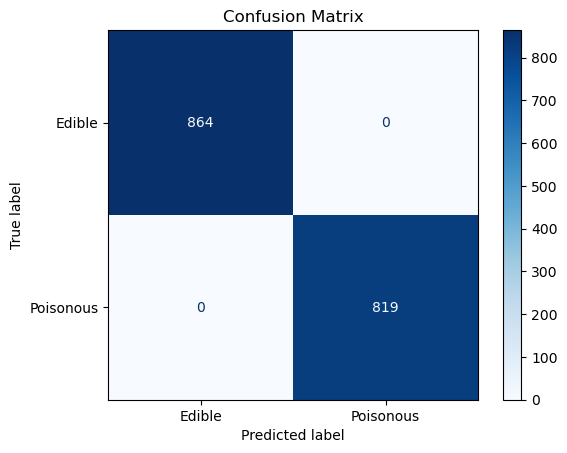

In [9]:
target_names = ['Edible', 'Poisonous']

matrix = confusion_matrix(yValidation, yPrediction)
display_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=target_names)
display_matrix.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()

Visually show the decision tree

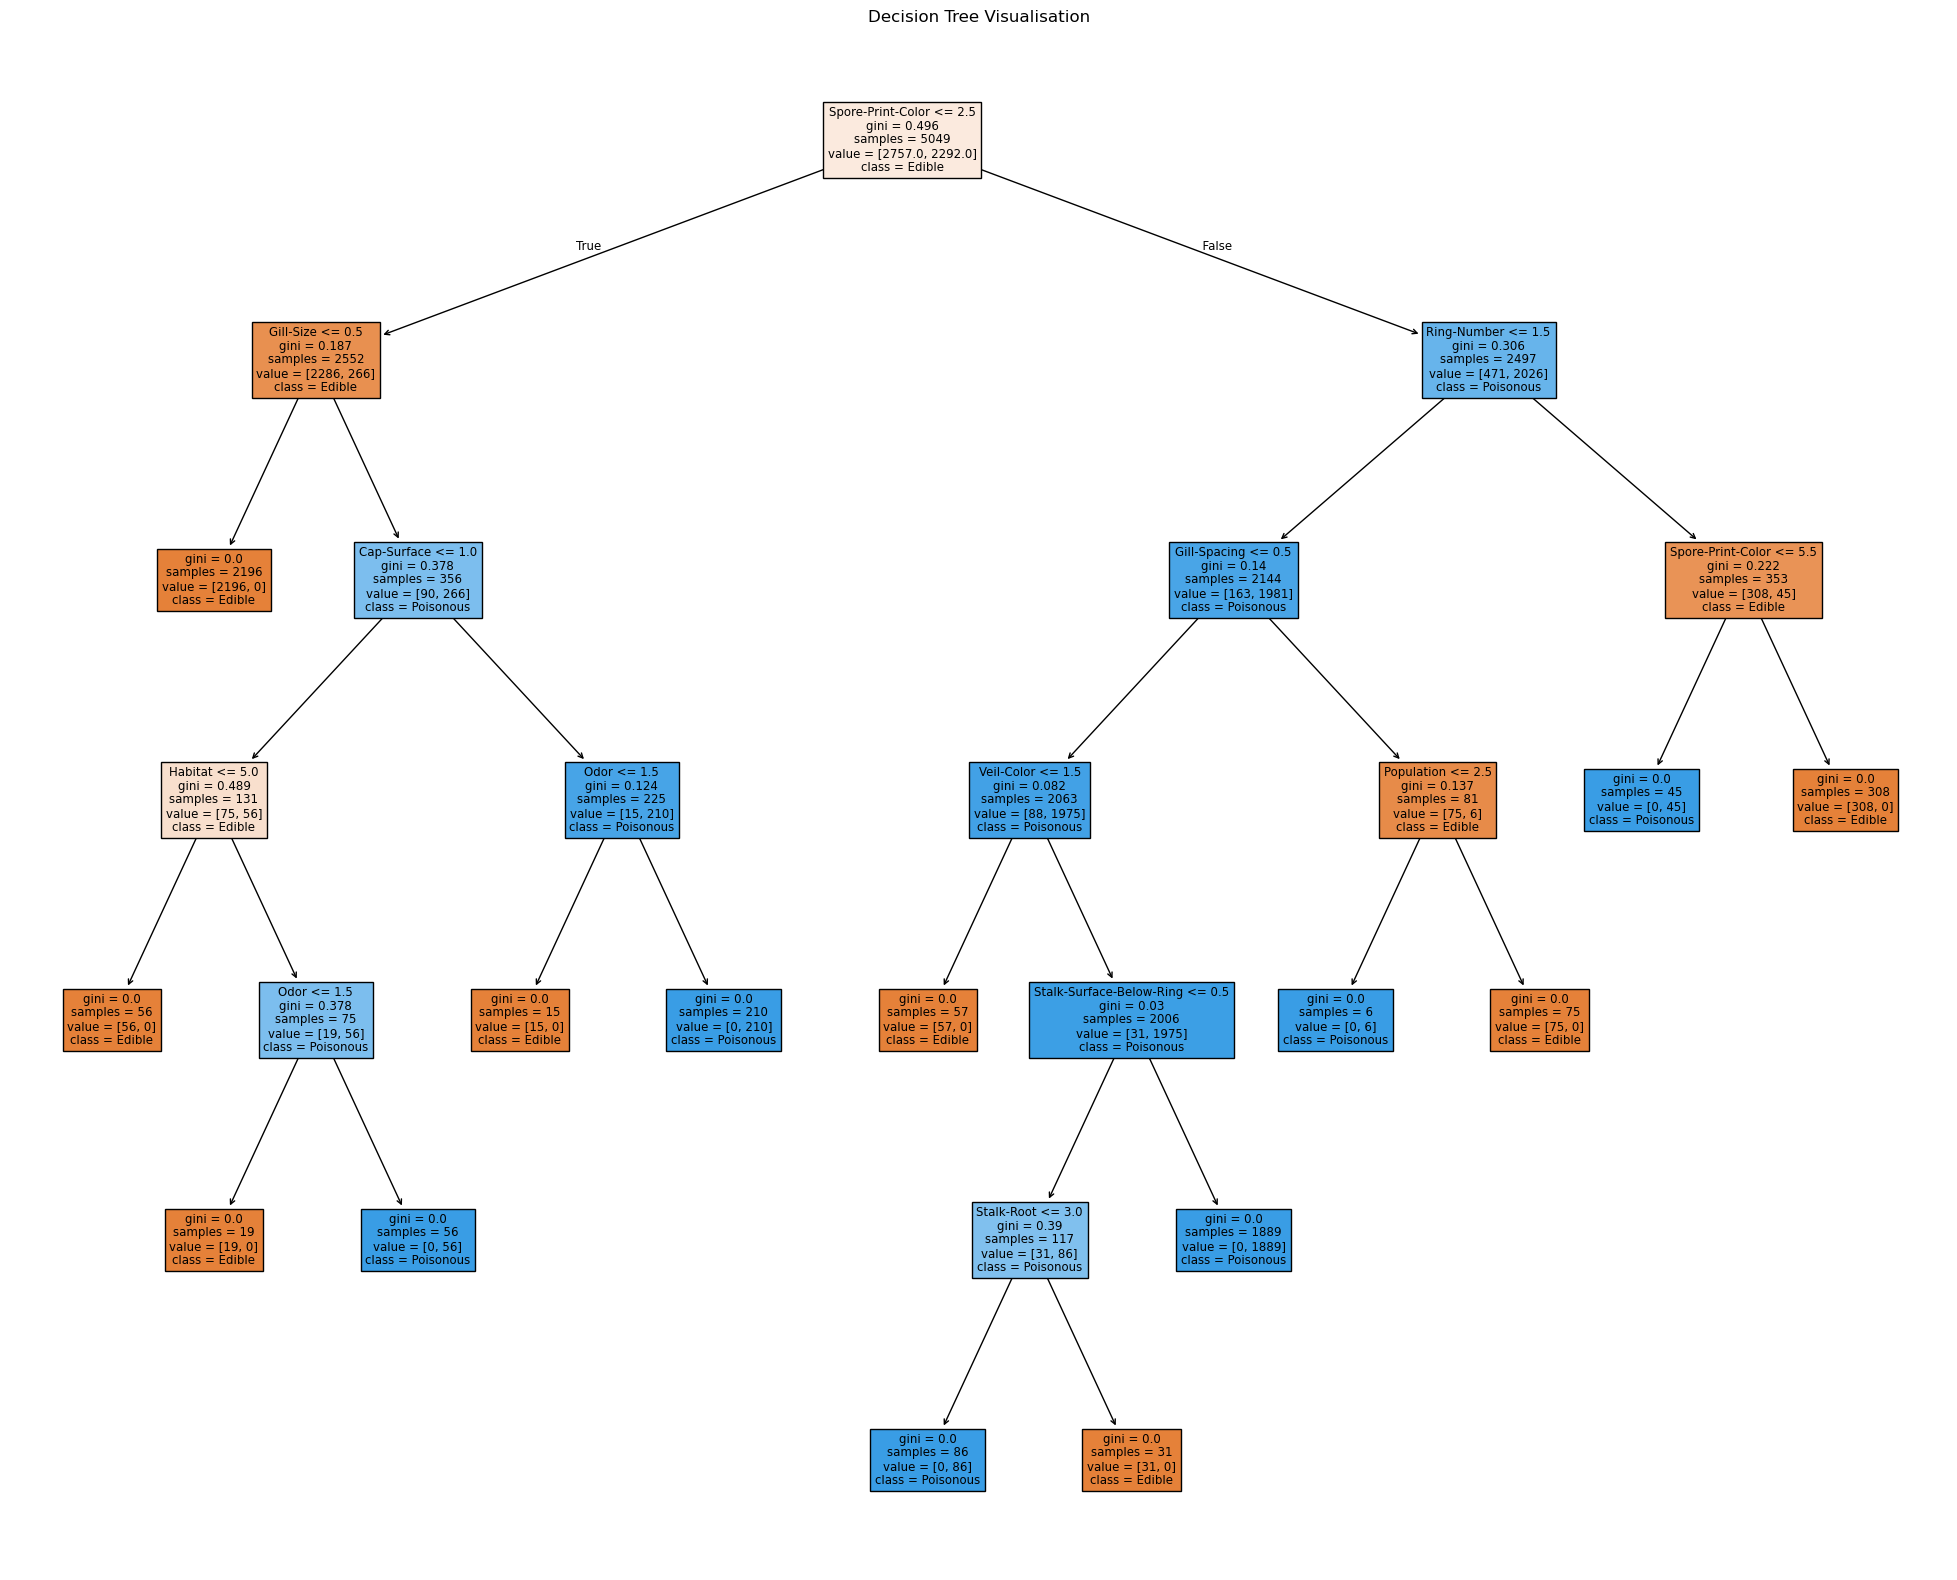

In [10]:
fig = plt.figure(figsize=(25,20))
feature_names = ['Cap-Shape', 'Cap-Surface', 'Cap-Color', 'Bruises', 'Odor', 'Gill-Attachment', 'Gill-Spacing', 'Gill-Size', 'Gill-Color', 'Stalk-Shape', 'Stalk-Root', 'Stalk-Surface-Above-Ring', 'Stalk-Surface-Below-Ring', 'Stalk-Color-Above-Ring', 'Stalk-Color-Below-Ring', 'Veil-Color', 'Ring-Number', 'Ring-Type', 'Spore-Print-Color', 'Population', 'Habitat']

plot_tree(decision_tree_model, feature_names=feature_names, class_names=target_names, filled=True)
plt.title('Decision Tree Visualisation')
plt.show()

## Smaller Decision Tree
The above model is overfit for the data as it achieves a 0% error rate.  
To remedy this the above code can be reran with a restriction on the size of the tree.

In [11]:
tree_depth = 3

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       857
           1       0.97      0.96      0.97       826

    accuracy                           0.97      1683
   macro avg       0.97      0.97      0.97      1683
weighted avg       0.97      0.97      0.97      1683



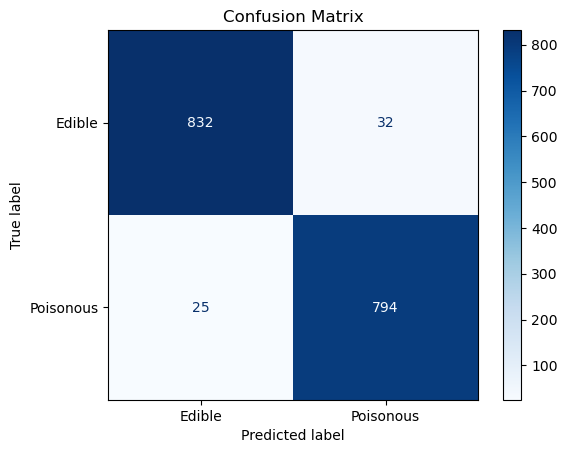

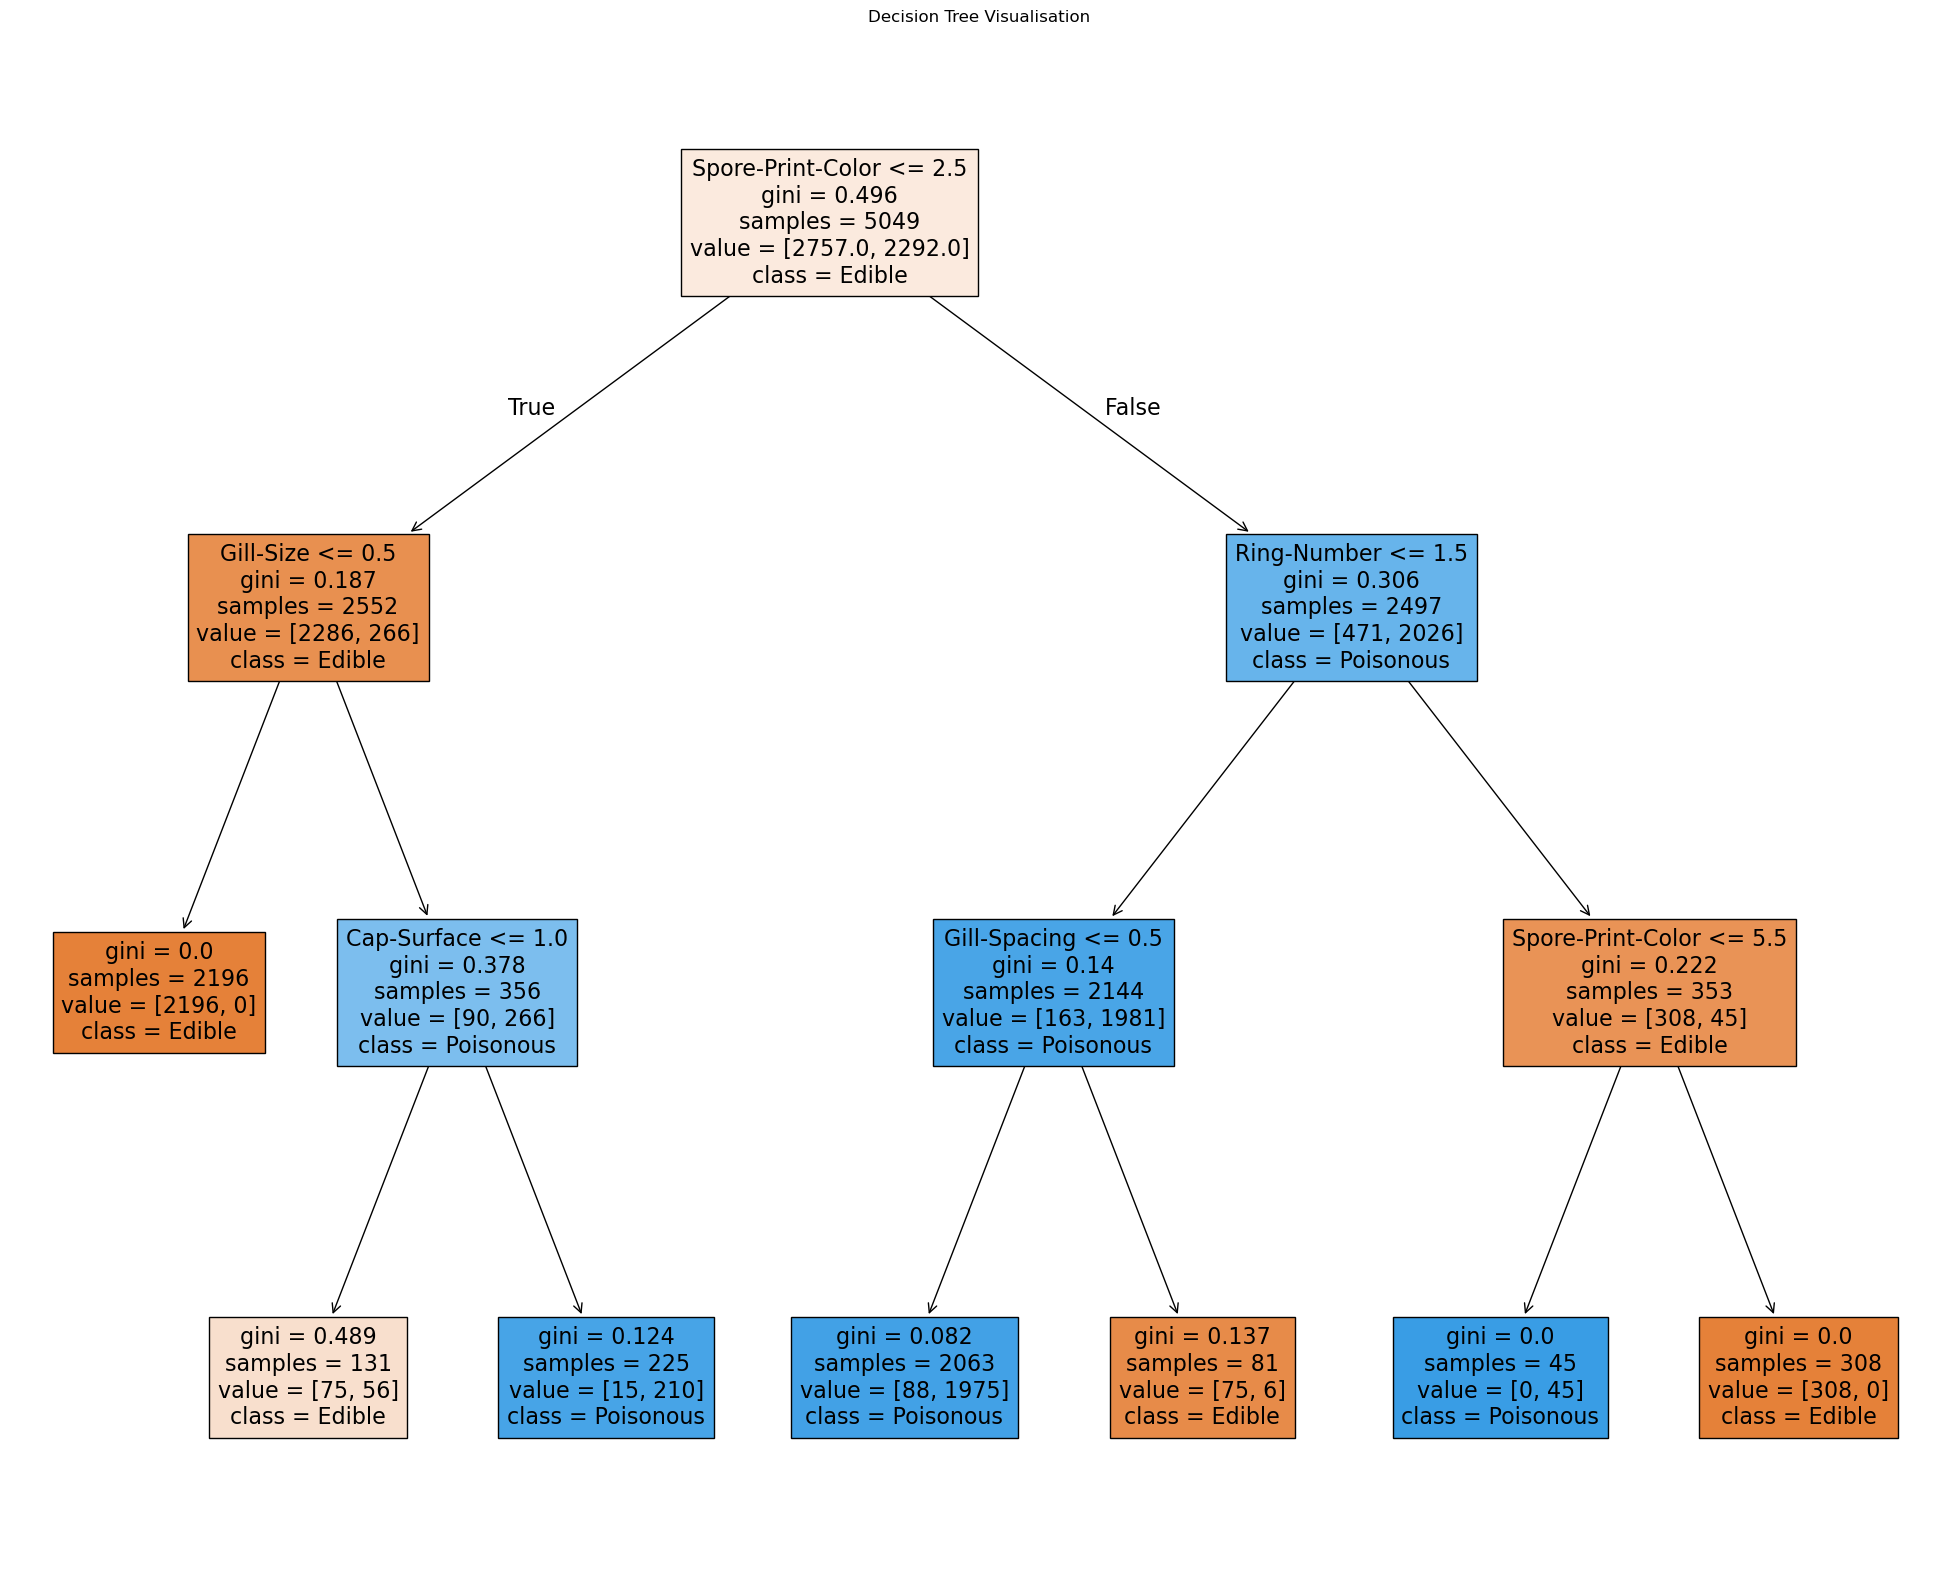

In [12]:
# Train smaller model
smaller_decision_tree_model = DecisionTreeClassifier(max_depth=tree_depth)
smaller_decision_tree_model.fit(xTrain, yTrain)

# Show metrics
yPrediction = smaller_decision_tree_model.predict(xValidation)
print(metrics.classification_report(yPrediction, yValidation))

# Show confusion matrix
target_names = ['Edible', 'Poisonous']

matrix = confusion_matrix(yValidation, yPrediction)
display_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=target_names)
display_matrix.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()

# Show tree
fig = plt.figure(figsize=(25,20))
feature_names = ['Cap-Shape', 'Cap-Surface', 'Cap-Color', 'Bruises', 'Odor', 'Gill-Attachment', 'Gill-Spacing', 'Gill-Size', 'Gill-Color', 'Stalk-Shape', 'Stalk-Root', 'Stalk-Surface-Above-Ring', 'Stalk-Surface-Below-Ring', 'Stalk-Color-Above-Ring', 'Stalk-Color-Below-Ring', 'Veil-Color', 'Ring-Number', 'Ring-Type', 'Spore-Print-Color', 'Population', 'Habitat']

plot_tree(smaller_decision_tree_model, feature_names=feature_names, class_names=target_names, filled=True)
plt.title('Decision Tree Visualisation')
plt.show()

## Create Random Forest
A Random Forest can also be created with the same **max_depth** to achieve better error rates.

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       881
           1       0.97      0.99      0.98       802

    accuracy                           0.98      1683
   macro avg       0.98      0.98      0.98      1683
weighted avg       0.98      0.98      0.98      1683



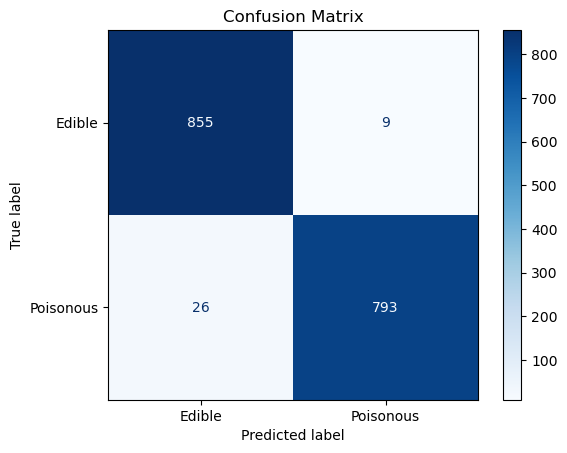

In [13]:
# Train Random Forest
random_forest_model = RandomForestClassifier(max_depth=tree_depth)
random_forest_model.fit(xTrain, yTrain)

# Show metrics
yPrediction = random_forest_model.predict(xValidation)
print(metrics.classification_report(yPrediction, yValidation))

# Show confusion matrix
target_names = ['Edible', 'Poisonous']

matrix = confusion_matrix(yValidation, yPrediction)
display_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=target_names)
display_matrix.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()

## Testing with Test Set
Finally the Test set is used on both the smaller Decision Tree and the Random Forest.

Testing Decision Tree

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       859
           1       0.97      0.96      0.96       825

    accuracy                           0.97      1684
   macro avg       0.97      0.97      0.97      1684
weighted avg       0.97      0.97      0.97      1684



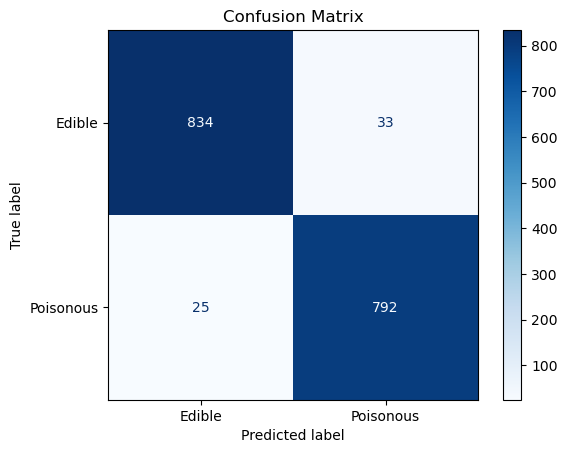

In [14]:
# Show metrics
yPrediction = smaller_decision_tree_model.predict(xTest)
print(metrics.classification_report(yPrediction, yTest))

# Show confusion matrix
target_names = ['Edible', 'Poisonous']

matrix = confusion_matrix(yTest, yPrediction)
display_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=target_names)
display_matrix.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()

Testing Random Forest

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       881
           1       0.97      0.99      0.98       803

    accuracy                           0.98      1684
   macro avg       0.98      0.98      0.98      1684
weighted avg       0.98      0.98      0.98      1684



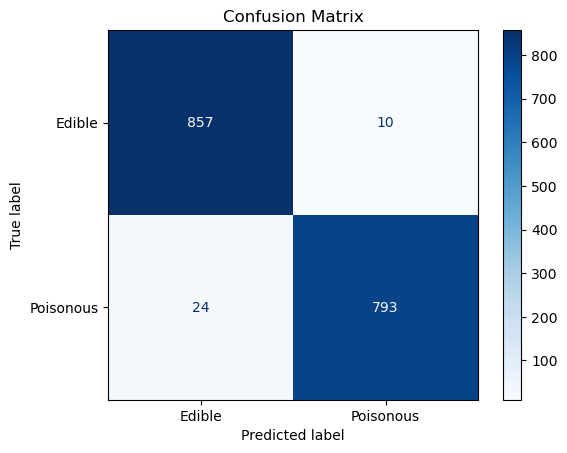

In [15]:
# Show metrics
yPrediction = random_forest_model.predict(xTest)
print(metrics.classification_report(yPrediction, yTest))

# Show confusion matrix
target_names = ['Edible', 'Poisonous']

matrix = confusion_matrix(yTest, yPrediction)
display_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=target_names)
display_matrix.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()

## Save model to disk

In [16]:
with open(f'models/random_forest.pkl', 'wb') as f:
    pickle.dump(random_forest_model,f)